In [1]:
from collections import namedtuple
import datetime


import numpy as np
import spacepy.plot as spp
import spacepy.toolbox as tb
import pymc as mc
import tqdm


/Users/blarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [12]:
x = mc.Uniform('x', 0, 1)
y = mc.Uniform('y', 0, 1)

# @mc.deterministic(plot=True)
# def pi(x=x, y=y):
#     inside = (x**2 + y**2) <= 1
#     outside = (x**2 + y**2) > 1
#     return 4*inside/outside

model = mc.MCMC((x, y))

In [ ]:
model.sample(50000, burn=0, burn_till_tuned=False)

 [-----------------100%-----------------] 50000 of 50000 complete in 2.9 sec

In [ ]:
mc.Matplot.plot(model)

Plotting y
Plotting x


In [ ]:
inside = np.sum(x.trace()**2 + y.trace()**2 < 1)
total  = len(x.trace())
pi     = 4*inside/total

print('PI: 4*{0}/{1}={2}'.format(inside, total, pi))

# Wrap all this is a loop to see how the $\sqrt{N}$ decrease of error 

In [ ]:
dat = namedtuple('Pi', 'niter error')
data = []

for i in tqdm.tqdm(tb.logspace(100, 1e7, 30)[::-1]):
    x = mc.Uniform('x', 0, 1)
    y = mc.Uniform('y', 0, 1)
    model = mc.MCMC((x, y))
    model.sample(i, burn=10, progress_bar=False)
    inside = np.sum(x.trace()**2 + y.trace()**2 < 1)
    total  = len(x.trace())
    pi     = 4*inside/total
    data.append(dat(i, np.abs((pi-np.pi)/np.pi)))
#     print(i, pi, np.abs((pi-np.pi)/np.pi))

  0%|          | 0/30 [00:00<?, ?it/s]

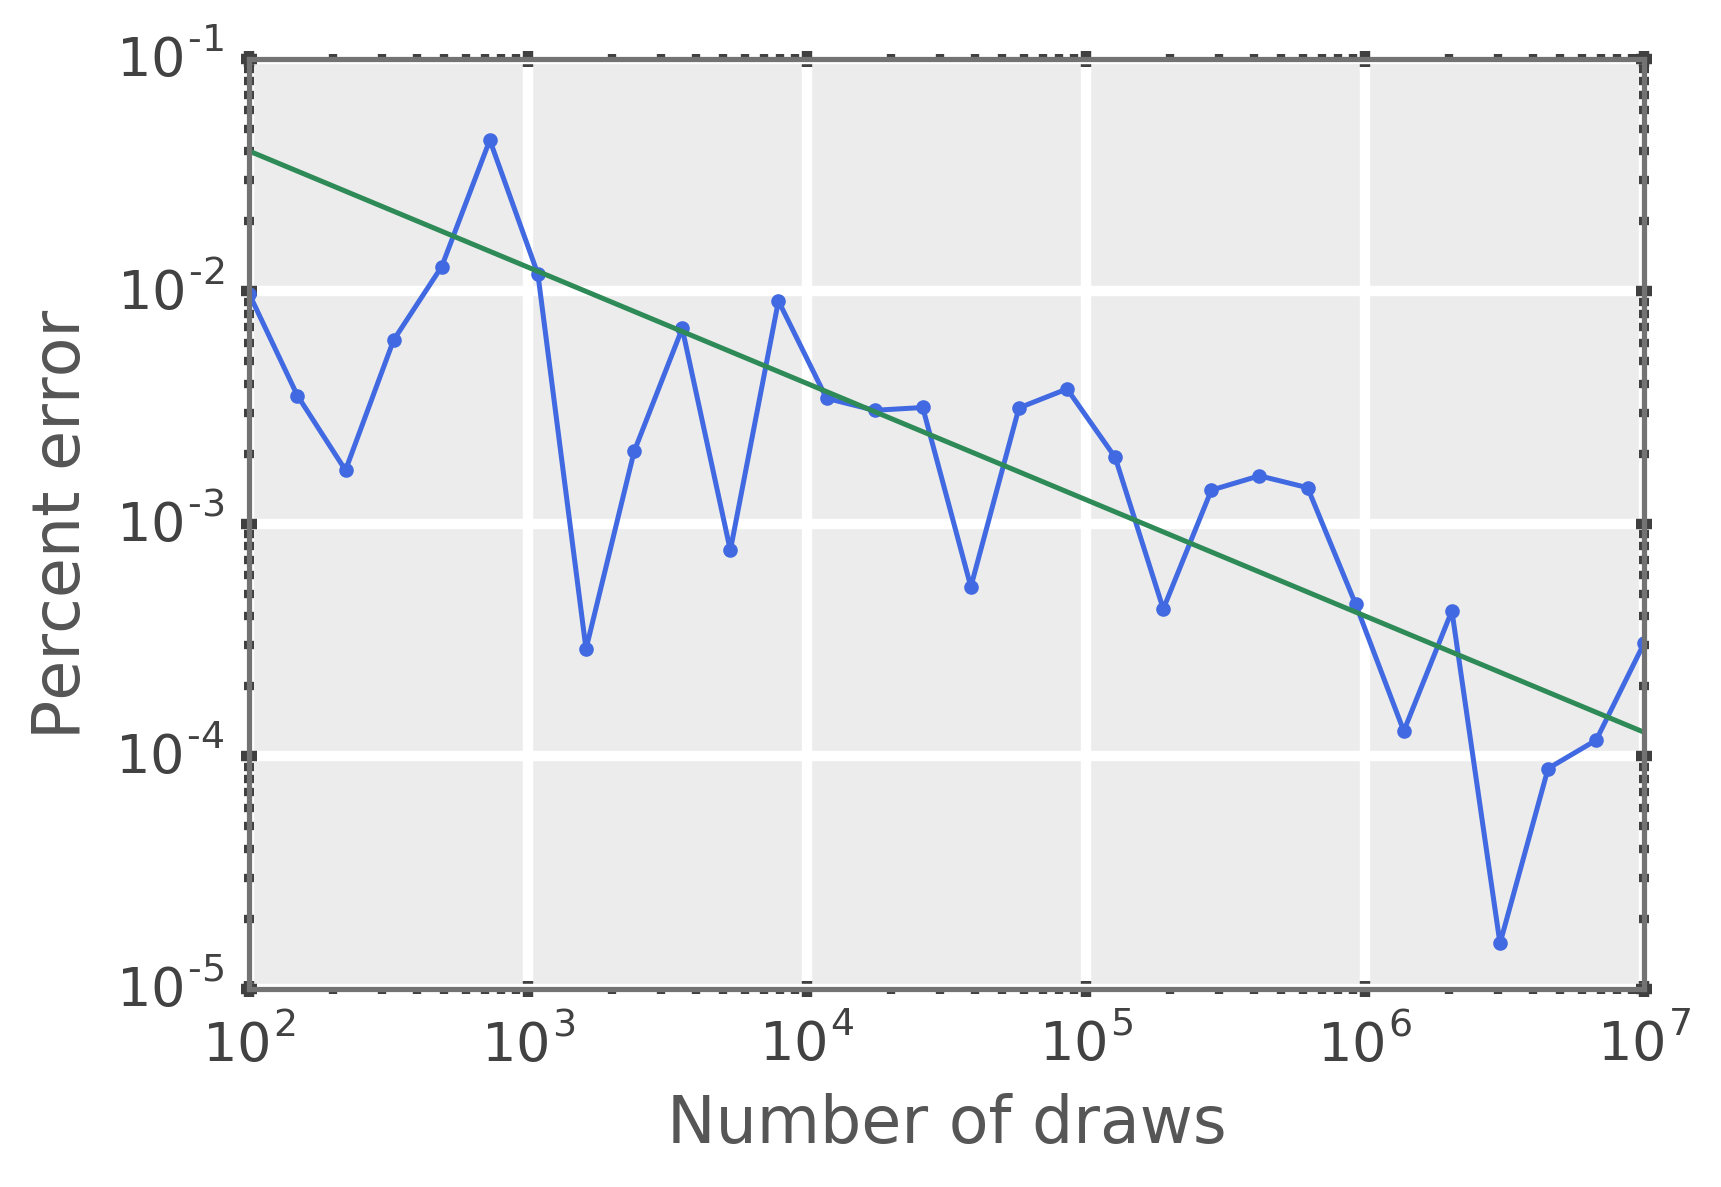

In [21]:
its = [v.niter for v in data]
err = [v.error for v in data]
spp.plt.loglog(its, err, '.-')
spp.plt.plot(its, 1/np.sqrt(its)*0.4)
spp.plt.xlabel('Number of draws')
spp.plt.ylabel('Percent error')
